In [1]:
%load_ext autoreload
%autoreload 2

import sys
from functools import partial
import importlib

import jax
import jax.numpy as jnp

sys.path.append('../../../')

import forward_model
importlib.reload(forward_model)
from forward_model.ics import get_delta
from forward_model.lpt import get_forward_lpt
from forward_model.plot_utils import plot_cubes, compare_deltas, compare_pow_spec

In [3]:
N, L, Z_I, Z_F = 128, 180, 99, 0

INPUT_ARG = "U"
R_S = 4
MUSCLE = True
MUSCLE_ITERS = "ONE"
SC_CORRECTION = True

SEED_INT = 1
key = jax.random.PRNGKey(SEED_INT)
input_arr = jax.random.normal(key, shape=(N**3,))

In [6]:
get_forward_lpt_ = partial(
    get_forward_lpt,
    N,
    L,
    Z_I,
    Z_F,
    INPUT_ARG=INPUT_ARG,
    MUSCLE=MUSCLE,
    MUSCLE_ITERS=MUSCLE_ITERS,
    R_S=R_S,
    SC_CORRECTION=SC_CORRECTION
)

lpt_methods = ['LPT1', 'LPT2', 'SC', 'ALPT']

deltas = []
for lpt_method in lpt_methods:
    forward_lpt = get_forward_lpt_(lpt_method)
    deltas.append(forward_lpt(input_arr))

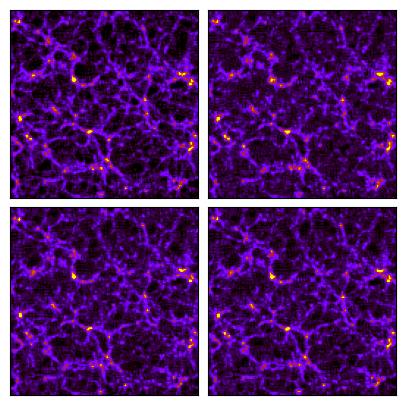

In [7]:
fig, ax = plot_cubes(deltas, cmap='gnuplot', vlim=(-1, 10), idx=N//2, width=1, axis=2, )

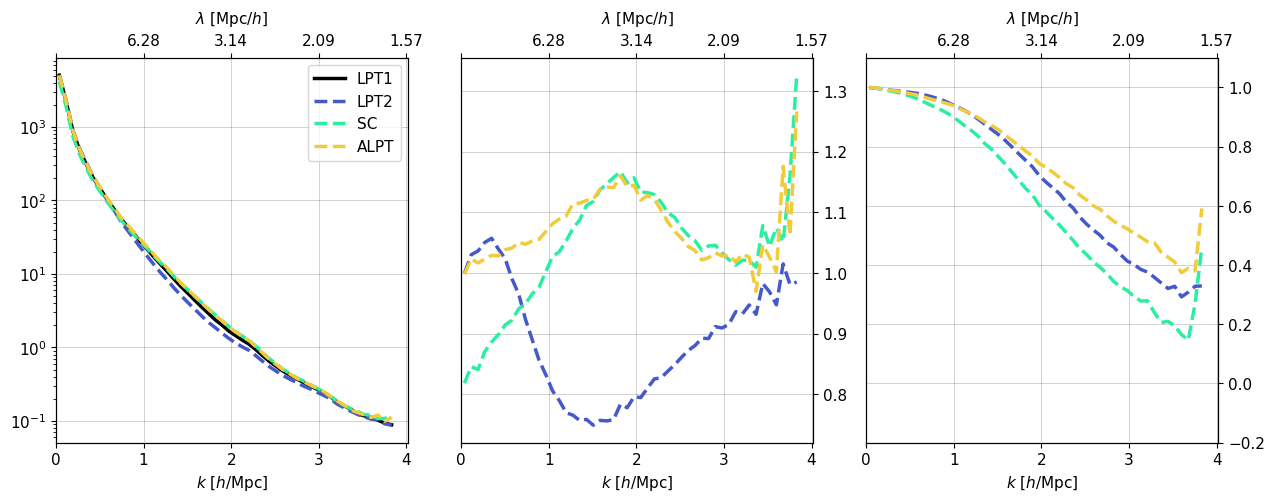

In [8]:
fig, axs = compare_pow_spec(deltas, L, n_bins=50, labels=lpt_methods)
#axs[0].set_ylim(1e0, 1e4)

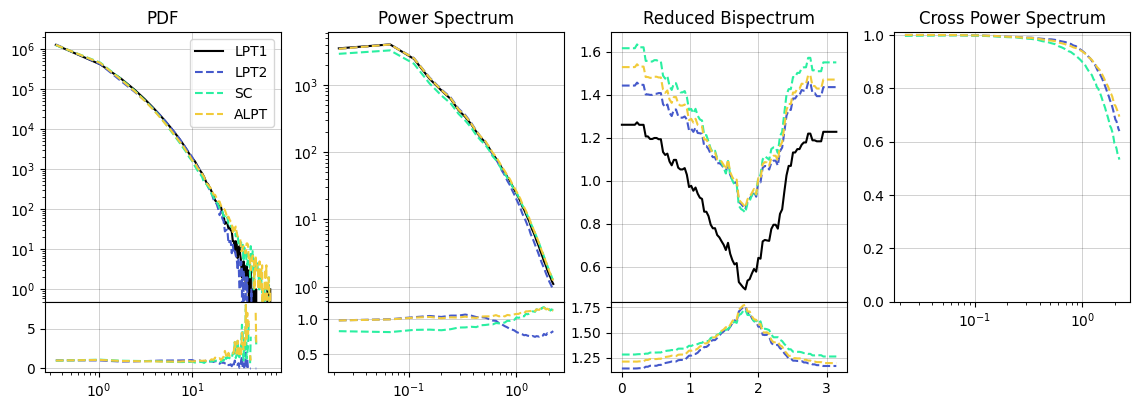

In [9]:
n_pdf_bins = 100
n_pk_bins = 50
n_thetas = 100
fig = compare_deltas(deltas[0], deltas[1:], L, n_pdf_bins=n_pdf_bins, n_pk_bins=n_pk_bins, n_thetas=n_thetas, ref_label=lpt_methods[0], labels=lpt_methods[1:])